In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


600

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
country = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
found_cities = []
date = []

counter = 0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    counter+=1
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        found_cities.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(city + f' not found {counter}')
    else:
        print(response['name'] + f' {counter}')
        
        
## HOW TO NUMBER CITIES output?
## HOW TO OUTPUT JPG? 

Jucás 1
Broome 2
Cockburn Town 3
Tasiilaq 4
Busselton 5
Ostrovnoy 6
Bethel 7
Chokurdakh 8
Puerto Ayora 9
Avera 10
Yangi Marg`ilon 11
Hermanus 12
Mineiros 13
Ust'-Koksa 14
São Félix do Xingu 15
sentyabrskiy not found 16
Jamestown 17
Salalah 18
Pontianak 19
Barrow 20
Kasempa 21
New Norfolk 22
Margate 23
Qaanaaq 24
Atuona 25
Kimbe 26
Jalu 27
Tuktoyaktuk 28
Arraial do Cabo 29
Bluff 30
Balclutha 31
Lebu 32
San Quintín 33
Ushuaia 34
Rikitea 35
Mossamedes 36
amderma not found 37
Khatanga 38
Bahía Blanca 39
Lima 40
Deputatsky 41
Port Elizabeth 42
Mehamn 43
Lata 44
Punta Arenas 45
Kasongo-Lunda 46
barentsburg not found 47
Khovd 48
Esperance 49
Paracuru 50
Karad 51
Dzaoudzi 52
Moroni 53
Laas 54
Kitimat 55
Kavieng 56
haibowan not found 57
Mersin Province 58
Gushikawa 59
samusu not found 60
Bredasdorp 61
Berlevåg 62
taolanaro not found 63
Emerald 64
Zapopan 65
Ambon City 66
Arrondissement de Bastia 67
Vardø 68
Florø 69
Kapaa 70
Ponta do Sol 71
Nome 72
Meulaboh 73
saleaula not found 74
East London 

Freetown 578
Saint-Leu 579
Glendive 580
Mahon 581
Necochea 582
Roblin 583
Paraúna 584
Koster 585
Santa Rosalía 586
College 587
Shihezi 588
Porto-Novo 589
Yumen 590
Taree 591
Coquimbo 592
Río Gallegos 593
Ellisras 594
Mananara 595
Thunder Bay 596
Kyzyl-Mazhalyk 597
Torit 598
Magdiwang 599
Luwuk 600


In [5]:
mylist = ['anthony', 'phil', 'paul', 'pincus']

blah = (0, 'anthony')

blah1, blah2 = 0, 'anthony'

for counter,name in enumerate(mylist):
    print(counter,name)

0 anthony
1 phil
2 paul
3 pincus


In [6]:
weather_dic = {
    'city' : found_cities,
    'country': country,
    'latitude' : lat,
    'longitude' : lon,
    'temperature' : temp,
    'humidity' : humid,
    'cloudy' : cloud,
    'wind speed' : wind,
    'date' : date
     }

weather_data2 = pd.DataFrame(weather_dic)
weather_data = weather_data2.loc[weather_data2['humidity']< 101]

In [7]:
weather_data

,city,country,latitude,longitude,temperature,humidity,cloudy,wind speed,date
0,Jucás,BR,-6.53,-39.53,72.39,57,1,3.60,1595898444
1,Broome,US,42.25,-75.83,75.15,83,1,5.82,1595898445
2,Cockburn Town,TC,21.46,-71.14,82.51,76,2,18.61,1595898267
3,Tasiilaq,GL,65.61,-37.64,42.80,87,65,3.36,1595898446
4,Busselton,AU,-33.65,115.33,52.07,98,96,9.78,1595898446
...,...,...,...,...,...,...,...,...,...
551,Thunder Bay,CA,48.40,-89.32,69.89,60,40,10.29,1595898456
552,Kyzyl-Mazhalyk,RU,51.13,90.60,57.49,83,100,2.39,1595898648
553,Torit,SS,4.41,32.57,67.91,89,93,2.86,1595898649
554,Magdiwang,PH,12.49,122.51,84.13,72,100,6.29,1595898649


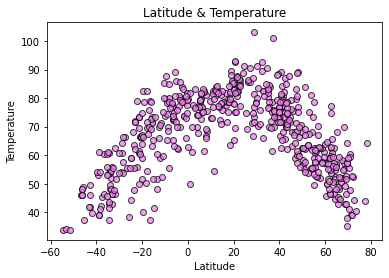

In [8]:
#latitude vs temperature
plt.scatter(weather_data['latitude'],weather_data['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig('../output_data/lat_temp.png')

**You can see the relation to where a city is located on earth and it's current temperature. The curve clearly represents the curviture of the earth and zero latitude being the equator**

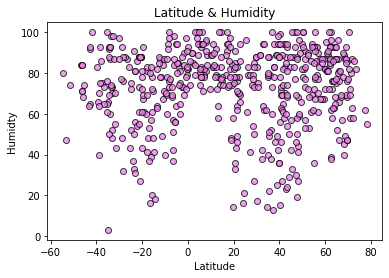

In [9]:
#latitude vs humidty
plt.scatter(weather_data['latitude'], weather_data['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty")

plt.savefig('../output_data/lat_hum.png')

**No clear trend comparing humidity and latitude of a city**

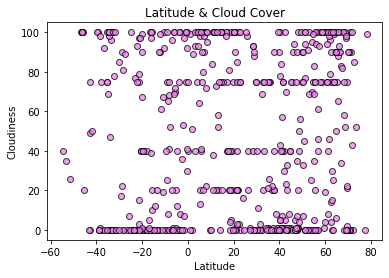

In [10]:
#latitude vs cloudiness
plt.scatter(weather_data['latitude'], weather_data['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig('../output_data/lat_cloud.png')

**Cloud cover seems pretty random for latitudes**

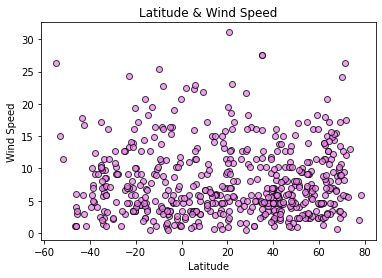

In [11]:
#latitude vs wind speed
plt.scatter(weather_data['latitude'],weather_data ['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig('../output_data/lat_wind.png')

**Wind speed is also showing no clear trend with regards to latitude**

In [12]:
northern = weather_data.loc[weather_data['latitude'] > 0]

In [13]:
southern = weather_data.loc[weather_data['latitude'] <= 0]

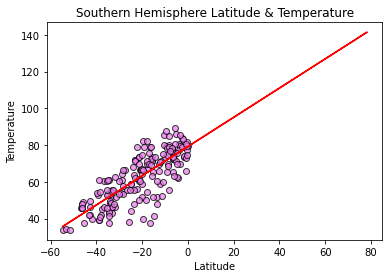

In [14]:
# southern latitude vs temperature
plt.scatter(southern['latitude'], southern['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['temperature'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")


plt.savefig('../output_data/south_lat_temp.png')

**There is a obvious trend showin the relationship between latitude and temperature. As the the latitude has a negative increase (further from the equator), the temperature decreases.**

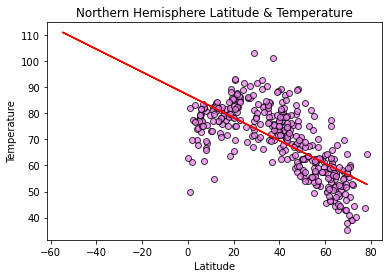

In [15]:
# northern latitude vs temperature
plt.scatter(northern['latitude'],northern['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['temperature'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_temp.png')

**The temperature decreases as latitude increases (gets further from the equator).**

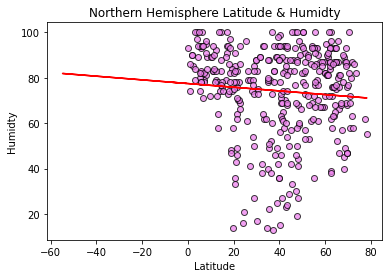

In [16]:
# northern latitude vs humidity
plt.scatter(northern['latitude'],northern['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Humidty")
plt.xlabel("Latitude")
plt.ylabel("Humidty")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['humidity'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_hum.png')

**Doesn't appear to be correlation**

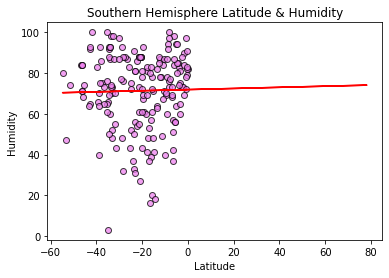

In [17]:
# southern latitude vs humidity
plt.scatter(southern['latitude'],southern['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['humidity'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/south_lat_hum.png')

**Little trend in relationship between latitude and humidity**

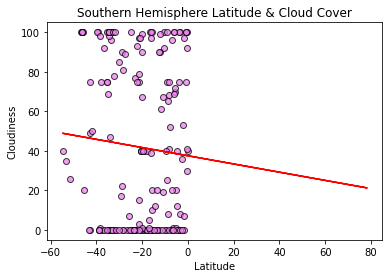

In [18]:
# southern latitude vs cloudiness
plt.scatter(southern['latitude'],southern['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['cloudy'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/south_lat_cloud.png')

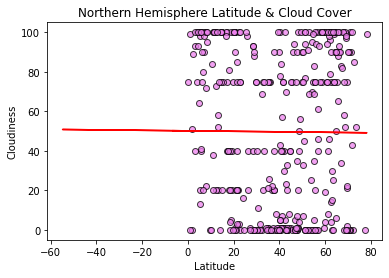

In [19]:
# northern latitude vs cloudiness
plt.scatter(northern['latitude'],northern['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['cloudy'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_cloud.png')

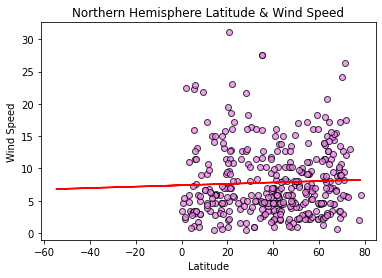

In [20]:
# northern latitude vs wind
plt.scatter(northern['latitude'],northern['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['wind speed'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_wind.png')

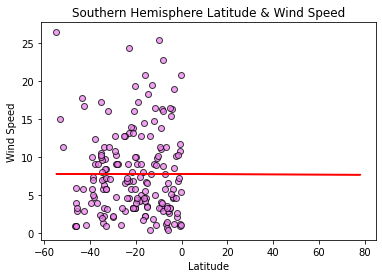

In [21]:
# southern latitude vs wind
plt.scatter(southern['latitude'],southern['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)
plt.title("Southern Hemisphere Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['wind speed'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/south_lat_wind.png')

In [22]:
weather_data.to_csv(r'../output_data/cities.csv')